In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from spectral import imshow, view_cube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import spectral.io.envi as envi

In [3]:
from numpy import genfromtxt

bands = genfromtxt('./helpers/bands.csv', delimiter=',')

In [4]:
date_dir = 11032019

roises = []
correcteds = []

for num in range(1, 10):
    roises.append(np.load("{}/bisbul_{}_rois.npy".format(date_dir, num)))
    correcteds.append(np.load("{}/bisbul_{}_corrected.npy".format(date_dir, num)))
  
roises = np.array(roises)
correcteds = np.array(correcteds)

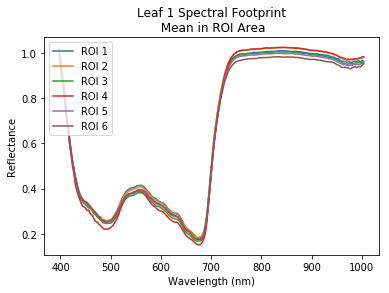

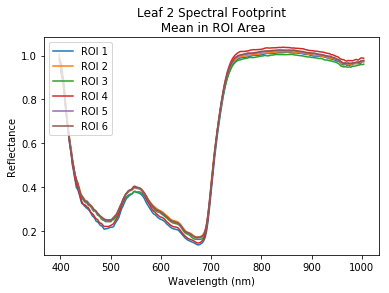

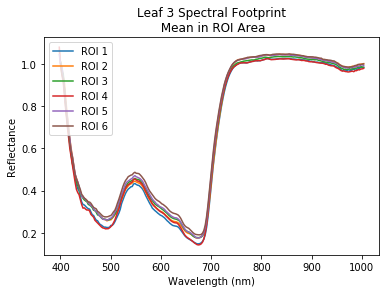

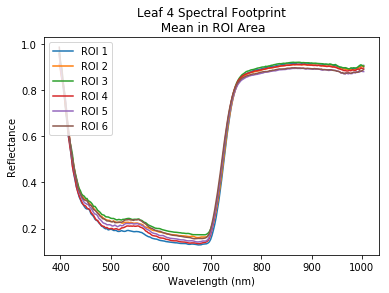

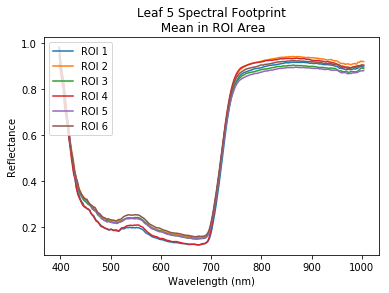

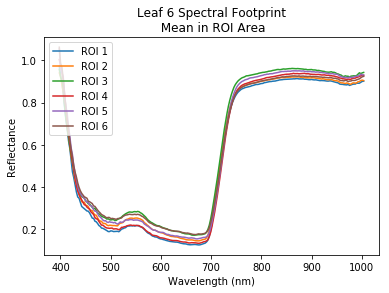

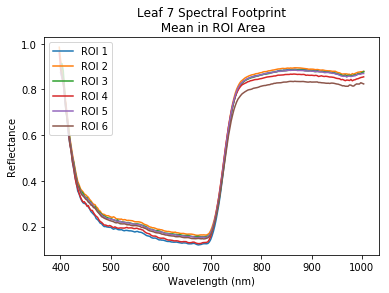

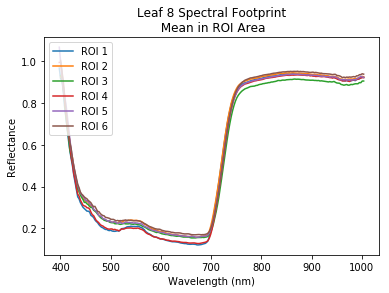

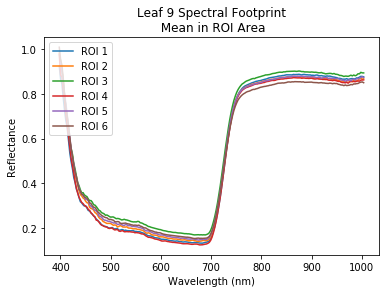

In [8]:
for r in range(roises.shape[0]):
    rois = roises[r, :, :, :]
    for i in range(len(rois)):
        roi = rois[i]
        intensity = []
        for b in range(roi.shape[2]):
            intensity.append(np.mean(roi[:, :, b]))
        plt.plot(bands, intensity, label='ROI {}'.format(i+1))

    plt.legend(loc='upper left')
    plt.title('Leaf {} Spectral Footprint\n Mean in ROI Area'.format(r+1))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.show()

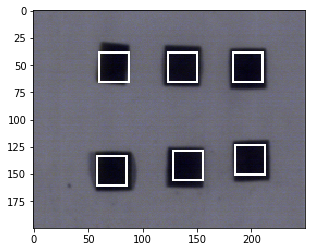

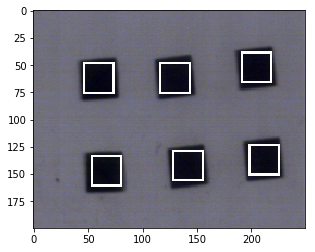

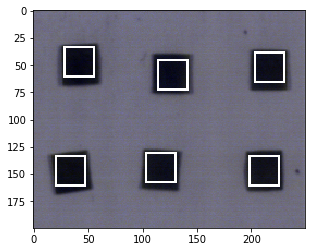

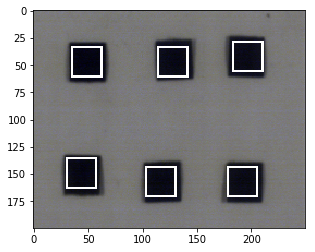

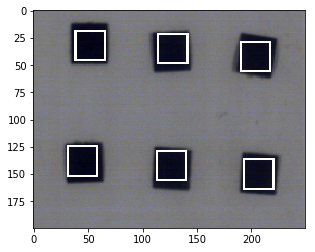

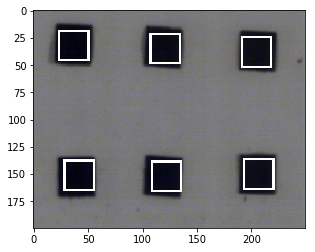

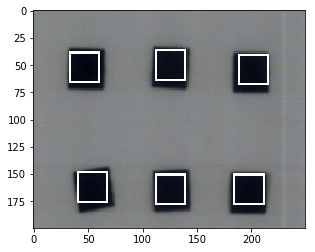

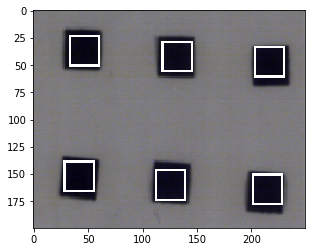

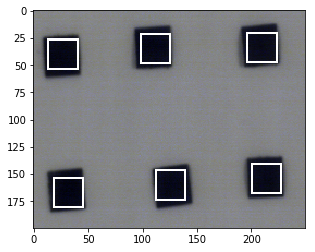

In [9]:
for i in range(correcteds.shape[0]):
    corrected = correcteds[i, :, :, :]
    imshow(corrected, (64, 55, 19))